# Estudo Experimental

In [1]:
%run ../src/feature_engineering.py
%run ../src/model_evaluation.py
%run ../src/plot.py
%run ../src/pipeline.py

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 160)

Using TensorFlow backend.


In [2]:
course_df = pd.read_csv('../data/preprocessed/preprocessed_edx_2014_enriched.csv',low_memory=False)

## Divisão dos Dados Em Cenários

In [3]:
course_df['course_year'] =  course_df['course_id'].astype(str) +'_'+course_df['year'].astype(str)
course_years = course_df['course_year'].unique()
#random.shuffle(course_years)
course_years = ['PH278x_2013', '8.MReV_2013', 'CS50x_2012','7.00x_2013',
                '8.02x_2013',  '3.091x_2013', 'ER22x_2013','14.73x_2013',
                'PH207x_2012', '6.00x_2012', '3.091x_2012', '2.01x_2013',
                 'CB22x_2013', '6.00x_2013', '6.002x_2012',  '6.002x_2013']

# Cenário de Análise Sem Eliminar linhas Inconsistentes
cen1 = course_years[0:5] 
# Cenário de Análise Eliminando linhas Inconsistentes
cen2 = course_years[5:10]
# Cenário de Análise Utilizando apenas as variáveis selecionadas.
cen3 = course_years[10:15]


cen1df = course_df[course_df['course_year'].isin(cen1)]
cen2df = course_df[course_df['course_year'].isin(cen2)]
cen3df = course_df[course_df['course_year'].isin(cen3)]  

In [4]:
print(cen1df.shape, cen2df.shape, cen3df.shape)

(270757, 35) (199738, 35) (148408, 35)


### Cenário 2 | Removendo Linhas com Grade Nulo ou Inconsistentes

In [5]:
cen2df = cen2df.dropna(subset=['grade'])
cen2df = cen2df[cen2df['incomplete_flag']!=1]
print(cen1df.shape, cen2df.shape, cen3df.shape)

(270757, 35) (175529, 35) (148408, 35)


### Cenário 3 | Identificando as variáveis correlacionadas à solução

In [6]:
related  = feature_extract(course_df.sample(100000))
related.head()

,viewed,explored,LoE_DI,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,...,gender_m,cc_eua,cc_central_north_america,cc_south_america,cc_europe,cc_asia,cc_oceania,cc_africa,cc_unknown,duration
542525,1,0,2,5,544.0,6.0,38.0,3.0,0,-1.0,...,1,0,0,0,1,0,0,0,0,27
627589,0,0,2,4,-1.0,1.0,-1.0,-1.0,0,1.0,...,1,0,0,0,0,1,0,0,0,0
542284,0,0,3,3,-1.0,1.0,-1.0,-1.0,0,1.0,...,0,0,0,0,1,0,0,0,0,0
349014,1,1,-1,-1,3539.0,47.0,327.0,11.0,2,-1.0,...,0,1,0,0,0,0,0,0,0,131
265136,0,0,1,5,-1.0,-1.0,-1.0,-1.0,0,-1.0,...,1,0,1,0,0,0,0,0,0,0


In [7]:
related.columns

Index(['viewed', 'explored', 'LoE_DI', 'YoB', 'nevents', 'ndays_act',
       'nplay_video', 'nchapters', 'nforum_posts', 'incomplete_flag', 'grade',
       'gender_f', 'gender_m', 'cc_eua', 'cc_central_north_america',
       'cc_south_america', 'cc_europe', 'cc_asia', 'cc_oceania', 'cc_africa',
       'cc_unknown', 'duration'],
      dtype='object')

In [8]:
import statsmodels.api as sm
from scipy import stats
import sklearn.preprocessing

In [9]:

XBase, y = related.loc[:, related.columns != 'grade'], related['grade']
X =  preprocessing.normalize(XBase)
print(X.shape, y.shape)


(100000, 21) (100000,)


In [10]:
X2 = sm.add_constant(X)
est = sm.OLS(np.asarray(y, dtype='float'), np.asarray(X2, dtype='float'))
r = est.fit()

r2 = r.f_test()
r2.summary()
#pd.options.display.float_format = '{:,.10f}'.format
#for i,c in enumerate(XBase.columns):
#    print(i, c, "{0:0.4f}".format(r.pvalues[i]))
    
#pd.DataFrame(r.pvalues)
#X2

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-ad5a6e95bbc0>", line 5, in <module>
    r2 = r.f_test()
TypeError: f_test() missing 1 required positional argument: 'r_matrix'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\ProgramData\Anaconda3\li

TypeError: f_test() missing 1 required positional argument: 'r_matrix'

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn import feature_selection

model = SelectKBest(score_func=feature_selection.mutual_info_regression, k=20)
r = model.fit(X, y)

print(r.scores_)
print(r.pvalues_)

pd.options.display.float_format = '{:,.10f}'.format
for i,c in enumerate(XBase.columns):
    print(i, c, "{0:0.4f}".format(r.scores_[i]))
    
#pd.DataFrame(r.pvalues)
#X2

## Formulação 1
### Cenário 1

2018-06-20 14:34:10 Iniciando modelo _SupportVectorMachine
2018-06-20 14:34:10 Iniciando curso CS50x
(169621, 35)
[LibSVM]2018-06-20 14:48:13 Treinamento OK!
2018-06-20 14:48:23 Resultados {'mean_squared_error': 0.01735361345736068, 'mean_absolute_error': 0.0994971731256151, 'explained_variance_score': 0.2604141423141787, 'r2_score': -0.18572541484834826, 'train_time': 913001, 'test_time': 6001, 'n_test': 67849, 'n_train': 101772}
2018-06-20 14:48:23 Iniciando curso PH278x
(39602, 35)
[LibSVM]2018-06-20 14:50:23 Treinamento OK!
2018-06-20 14:50:29 Resultados {'mean_squared_error': 0.16312686701956458, 'mean_absolute_error': 0.2523684893712918, 'explained_variance_score': 0.07835855985388407, 'r2_score': 0.03524472131555856, 'train_time': 80001, 'test_time': 2004, 'n_test': 15841, 'n_train': 23761}
2018-06-20 14:50:30 Iniciando curso 7.00x
(21009, 35)
[LibSVM]2018-06-20 14:50:41 Treinamento OK!
2018-06-20 14:50:41 Resultados {'mean_squared_error': 0.04628306803809289, 'mean_absolute_err

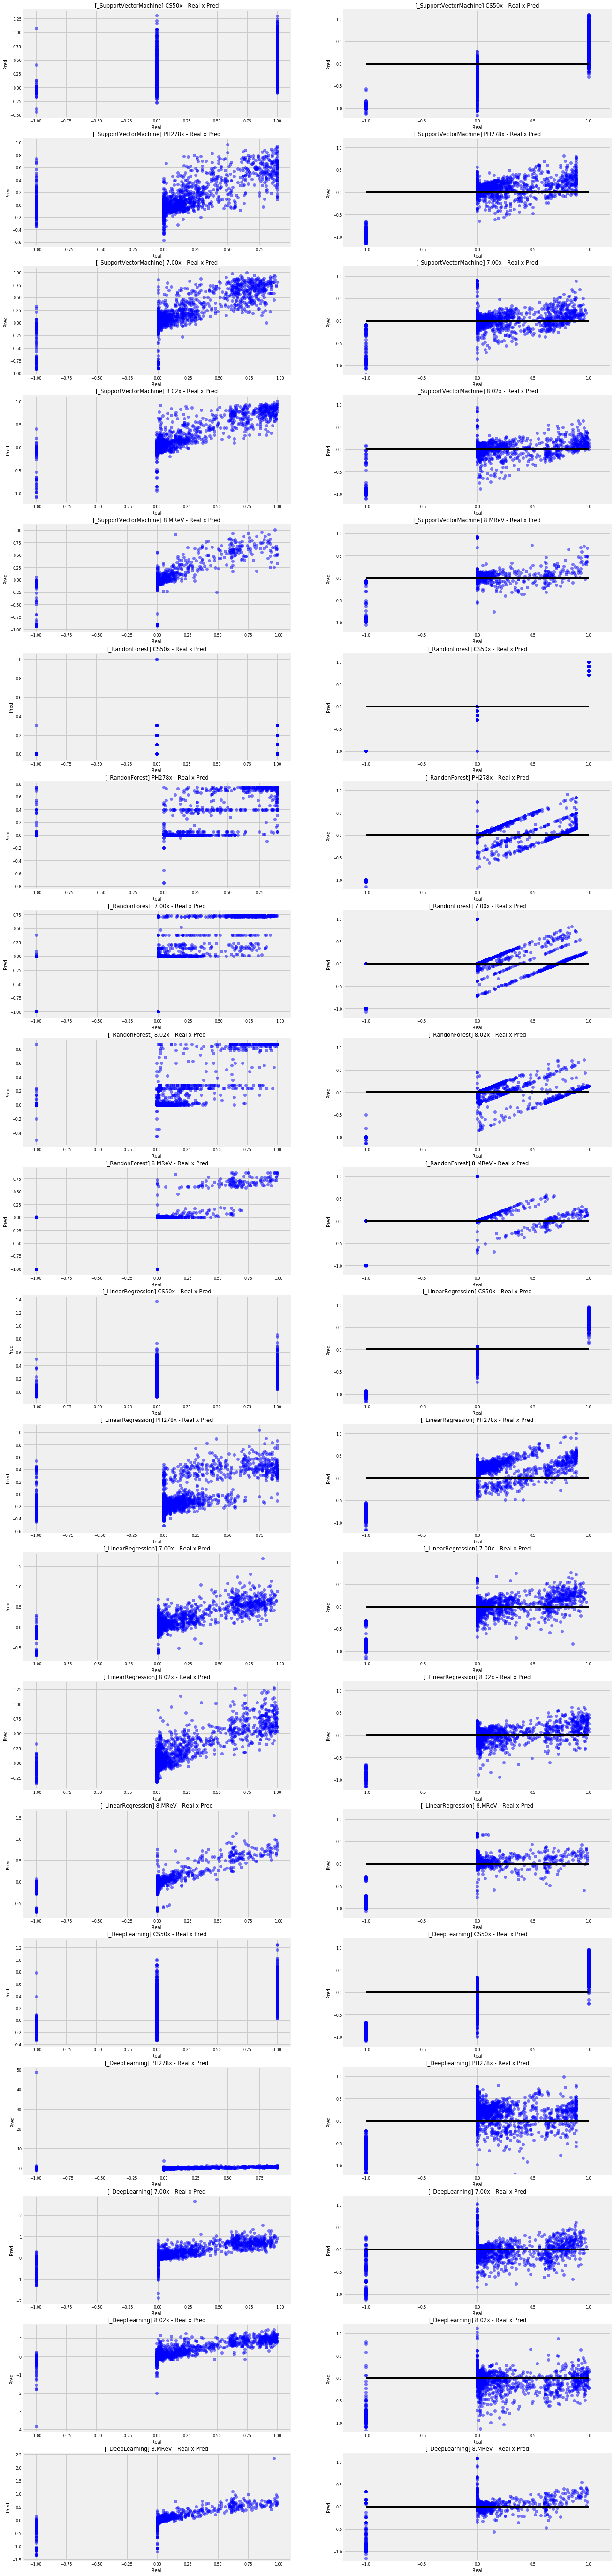

In [30]:
plt.rcParams.update({'font.size': 8})


#fig = plt.figure()
#fig.suptitle("Variáveis Quantitativas - Variação do resultado em relação à participação no curso", fontsize=18)


plt.rcParams['figure.figsize'] = (20, 100)

class ModelDecorator:
    def __init__(self, model):
        self._model = model
        
    def fit(self, X, y):
        return self._model.fit(X, y.values, epochs=100, verbose=0)
    
    def predict(self, X):
        flatten = lambda l: [item for sublist in l for item in sublist]
        return flatten(self._model.predict(X))

class _LinearRegression:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('lr', LinearRegression())])
    def sample_size(self):
        return None
    
class _DecisionTree:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('dt', DecisionTreeRegressor(criterion='mae', max_depth=5))])
    def sample_size(self):
        return None
    
class _DeepLearning:
    def __init__(self, input_dim=21):
        self._input_dim = input_dim
    
    def provide(self):
        model = models.Sequential()
        model.add(layers.Dense(48, activation='relu', input_dim = self._input_dim))
        model.add(layers.Dense(48, activation='relu'))     
        model.add(layers.Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        return ModelDecorator(model)
    def sample_size(self):
        return None
    
class _SupportVectorMachine:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('poly', SVR(cache_size=7000, verbose=True))])
    def sample_size(self):
        return None
        
class _RandonForest:
    def provide(self):
        return Pipeline([('scaler', StandardScaler()),
                  ('rfr', RandomForestRegressor(criterion='mae',  max_depth=3))])
    def sample_size(self):
        return None

_models = [    
    _SupportVectorMachine(),
    _RandonForest(),
    _LinearRegression(),
    _DeepLearning(),
    
]


results1, plt = train_evaluate(_models, cen1df, feature_extractor= feature_extract, 
                              label='grade', split_criteria='course_id', evaluation=regression_evaluation, 
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()

In [31]:
results1

{'_DeepLearning': {'7.00x': {'explained_variance_score': 0.49039313247256655,
   'mean_absolute_error': 0.0945732069621727,
   'mean_squared_error': 0.047433447767153955,
   'n_test': 8404,
   'n_train': 12605,
   'r2_score': 0.4796317321696796,
   'test_time': 5003,
   'train_time': 739998},
  '8.02x': {'explained_variance_score': 0.22796299790135288,
   'mean_absolute_error': 0.13896741232530316,
   'mean_squared_error': 0.07088808820255463,
   'n_test': 12420,
   'n_train': 18628,
   'r2_score': 0.22450069443101417,
   'test_time': 5001,
   'train_time': 627002},
  '8.MReV': {'explained_variance_score': 0.39379319588758477,
   'mean_absolute_error': 0.11209994061433115,
   'mean_squared_error': 0.0561221151847786,
   'n_test': 3791,
   'n_train': 5686,
   'r2_score': 0.39376012932031246,
   'test_time': 2000,
   'train_time': 806005},
  'CS50x': {'explained_variance_score': 0.30111470302608945,
   'mean_absolute_error': 0.024213398157395927,
   'mean_squared_error': 0.01025583131618

### Cenário 2


2018-06-20 15:42:29 Iniciando modelo _SupportVectorMachine
2018-06-20 15:42:29 Iniciando curso PH207x
(35481, 35)
[LibSVM]2018-06-20 15:42:44 Treinamento OK!
2018-06-20 15:42:45 Resultados {'mean_squared_error': 0.012328217230265493, 'mean_absolute_error': 0.08212249941109616, 'explained_variance_score': 0.8044784444068942, 'r2_score': 0.7418822587327166, 'train_time': 915002, 'test_time': 1002, 'n_test': 14193, 'n_train': 21288}
2018-06-20 15:42:46 Iniciando curso ER22x
(46935, 35)
[LibSVM]2018-06-20 15:43:08 Treinamento OK!
2018-06-20 15:43:10 Resultados {'mean_squared_error': 0.012146319896637689, 'mean_absolute_error': 0.05563653078826313, 'explained_variance_score': 0.665954768338928, 'r2_score': 0.656822929614149, 'train_time': 625002, 'test_time': 3009, 'n_test': 18774, 'n_train': 28161}
2018-06-20 15:43:10 Iniciando curso 6.00x
(64840, 35)
[LibSVM]2018-06-20 15:43:49 Treinamento OK!
2018-06-20 15:43:50 Resultados {'mean_squared_error': 0.008679507843853688, 'mean_absolute_error

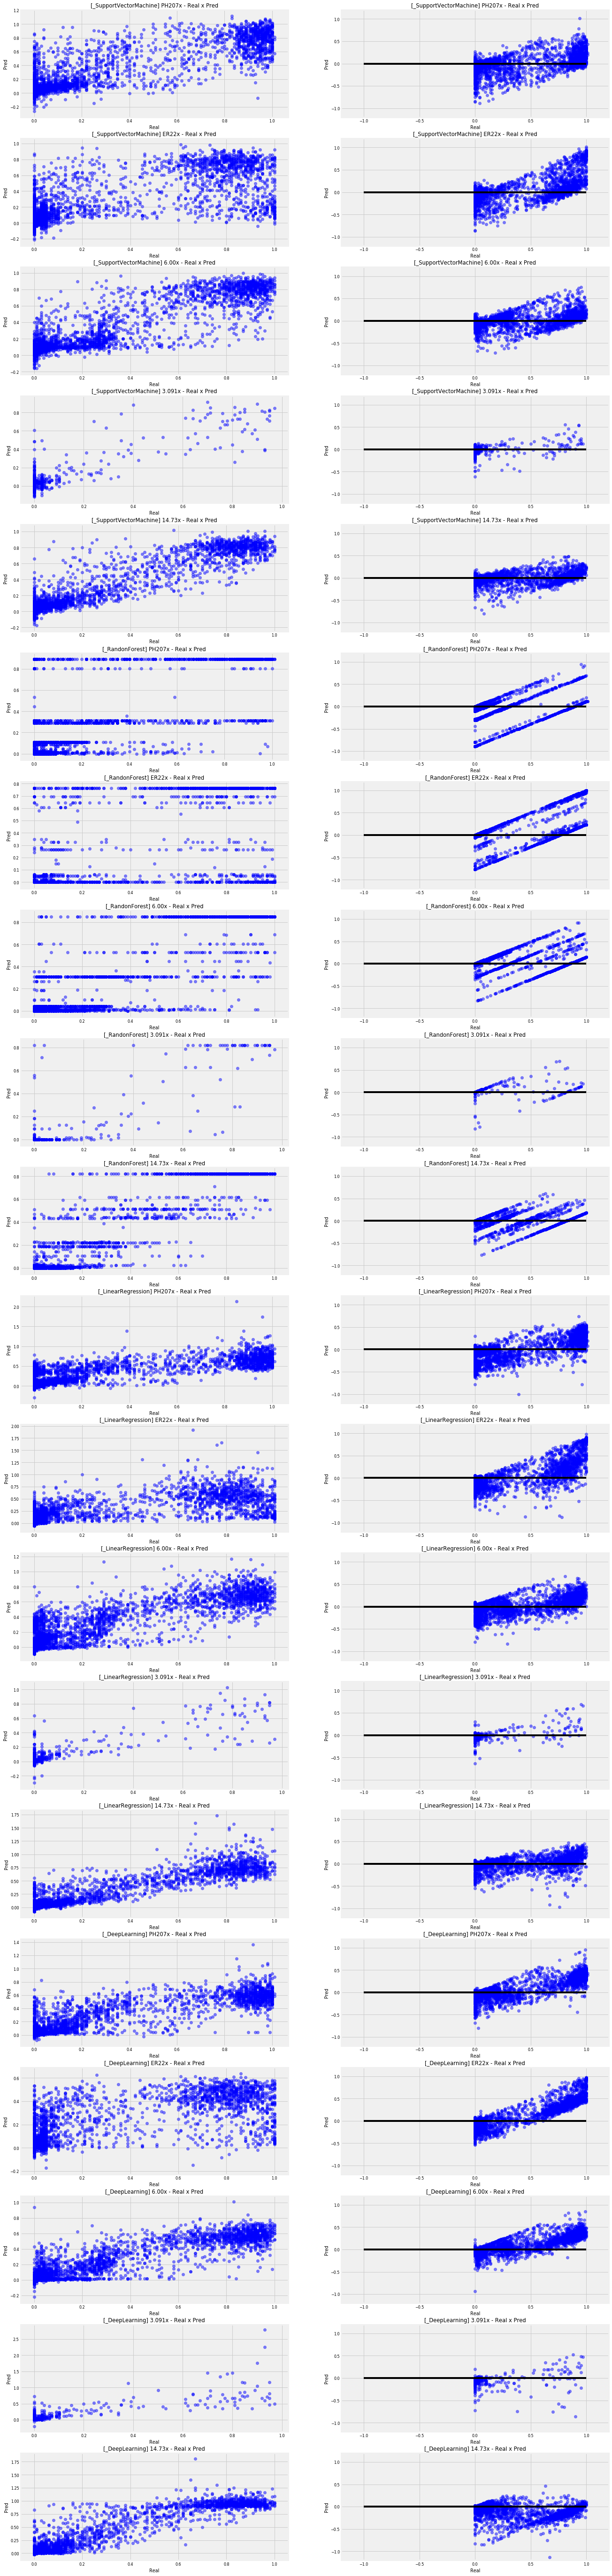

In [32]:
results2, plt = train_evaluate(_models, cen2df, feature_extractor= feature_extract, 
                              label='grade', split_criteria='course_id', evaluation=regression_evaluation, 
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()

In [33]:
results2

{'_DeepLearning': {'14.73x': {'explained_variance_score': 0.8649440015645246,
   'mean_absolute_error': 0.03347740597726554,
   'mean_squared_error': 0.008111855845287275,
   'n_test': 9452,
   'n_train': 14176,
   'r2_score': 0.8515986883368564,
   'test_time': 6001,
   'train_time': 379999},
  '3.091x': {'explained_variance_score': 0.5570821091827518,
   'mean_absolute_error': 0.031183131666858037,
   'mean_squared_error': 0.008802789288003333,
   'n_test': 1858,
   'n_train': 2787,
   'r2_score': 0.5339706976859049,
   'test_time': 2007,
   'train_time': 796002},
  '6.00x': {'explained_variance_score': 0.8327810698162338,
   'mean_absolute_error': 0.018053825583849287,
   'mean_squared_error': 0.004618131134551769,
   'n_test': 25936,
   'n_train': 38904,
   'r2_score': 0.8275855017881291,
   'test_time': 13999,
   'train_time': 182002},
  'ER22x': {'explained_variance_score': 0.6155091382552901,
   'mean_absolute_error': 0.046330364580204966,
   'mean_squared_error': 0.013614746158

### Cenário 3

2018-06-20 20:36:57 Iniciando modelo _SupportVectorMachine
2018-06-20 20:36:57 Iniciando curso CB22x
(30002, 35)
[LibSVM]2018-06-20 20:37:47 Treinamento OK!
2018-06-20 20:37:50 Resultados {'mean_squared_error': 0.16286908925307314, 'mean_absolute_error': 0.25124775353773104, 'explained_variance_score': 0.06608291391300647, 'r2_score': 0.015024394236570648, 'train_time': 527786, 'test_time': 3004, 'n_test': 12001, 'n_train': 18001}
2018-06-20 20:37:50 Iniciando curso 6.002x
(40811, 35)
[LibSVM]2018-06-20 20:38:49 Treinamento OK!
2018-06-20 20:38:53 Resultados {'mean_squared_error': 0.1686150582592388, 'mean_absolute_error': 0.25489515792794887, 'explained_variance_score': 0.23836122374071045, 'r2_score': 0.18649413625950328, 'train_time': 329842, 'test_time': 3001, 'n_test': 16325, 'n_train': 24486}
2018-06-20 20:38:54 Iniciando curso 2.01x
(5665, 35)
[LibSVM]2018-06-20 20:38:55 Treinamento OK!
2018-06-20 20:38:55 Resultados {'mean_squared_error': 0.07798761545395616, 'mean_absolute_err

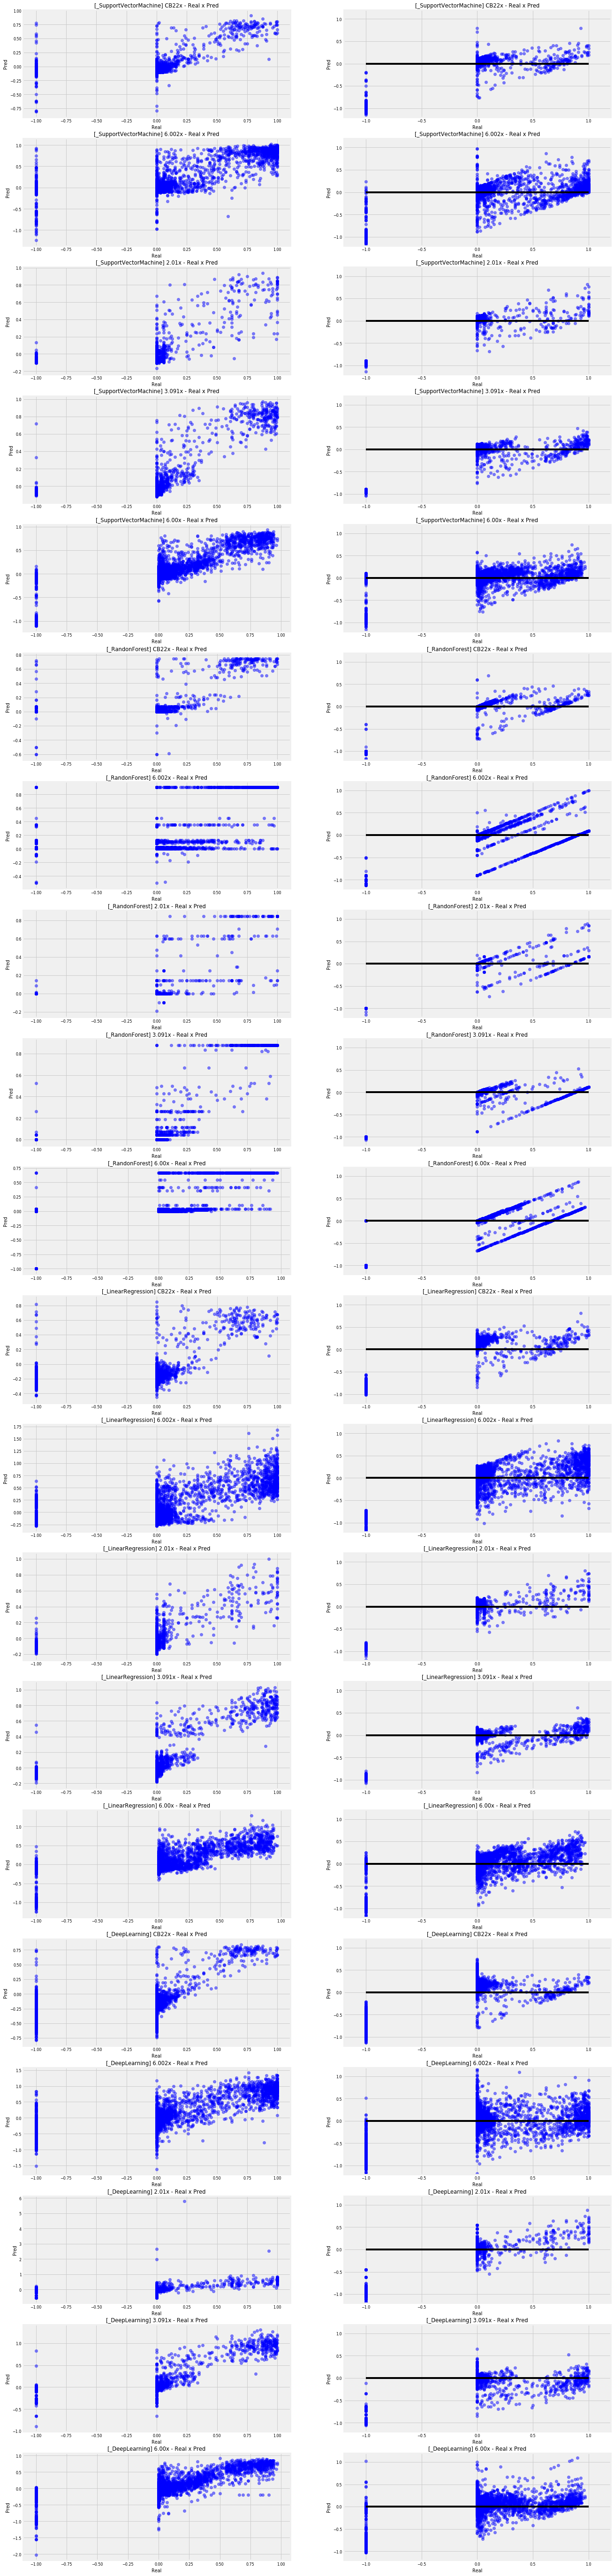

In [37]:
class _DeepLearning:
    def __init__(self, input_dim=21):
        self._input_dim = input_dim
    
    def provide(self):
        model = models.Sequential()
        model.add(layers.Dense(48, activation='relu', input_dim = self._input_dim))
        model.add(layers.Dense(48, activation='relu'))     
        model.add(layers.Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        return ModelDecorator(model)
    def sample_size(self):
        return None
    
    
_model3 = [    
    _SupportVectorMachine(),
    _RandonForest(),
    _LinearRegression(),
    _DeepLearning(8),
]



def feat_extract_selected(df):
    data = feature_extract(df)
    return data[['grade',
                'LoE_DI',
                'viewed',
                'explored',
                'YoB',
                'duration',
                'ndays_act',
                'nplay_video',
                'nchapters']]

results3, plt = train_evaluate(_model3, cen3df, feature_extractor= feat_extract_selected, 
                              label='grade', split_criteria='course_id', evaluation=regression_evaluation, 
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()

In [38]:
results3

{'_DeepLearning': {'2.01x': {'explained_variance_score': 0.06657326825997767,
   'mean_absolute_error': 0.17594676991084562,
   'mean_squared_error': 0.1039716613642434,
   'n_test': 2266,
   'n_train': 3399,
   'r2_score': 0.0659074104213554,
   'test_time': 2000,
   'train_time': 663999},
  '3.091x': {'explained_variance_score': 0.36494051005577044,
   'mean_absolute_error': 0.13022184210965385,
   'mean_squared_error': 0.06813383585061315,
   'n_test': 5686,
   'n_train': 8529,
   'r2_score': 0.3570685488680838,
   'test_time': 5002,
   'train_time': 526003},
  '6.002x': {'explained_variance_score': 0.25616707247214954,
   'mean_absolute_error': 0.2942910210559963,
   'mean_squared_error': 0.15490558089613207,
   'n_test': 16325,
   'n_train': 24486,
   'r2_score': 0.2526373404243297,
   'test_time': 6999,
   'train_time': 276002},
  '6.00x': {'explained_variance_score': 0.5334726754353919,
   'mean_absolute_error': 0.13198324238785133,
   'mean_squared_error': 0.061692278696398456,